In [1]:
#CIFAR DATASET
#60000 images of 32*32 pixels
#split into 50000 for training and 10000 for testing
#10 labels (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck)

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 54s 0us/step


In [1]:
#LABELS
#0: airplae
#1: automobile
#2: bird
#3: cat
#4: deer
#5: dog
#6: frog
#7: horse
#8: ship
#9: truck

In [3]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [4]:
#x_train consists of 50000 images, 32 pixels in height and width, 3 pixels in depth (RGB)
#y_train shows 1 label for each image

#look at individual image
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


The label is: [6]


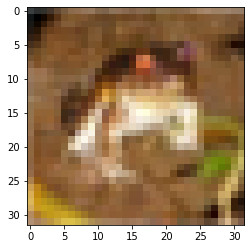

In [8]:
#view the image as an actual image with its label

import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imshow(x_train[0])
print('The label is:', y_train[0])

The label is: [9]


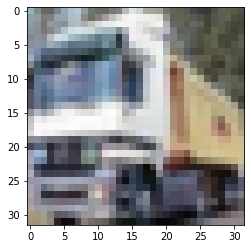

In [9]:
img = plt.imshow(x_train[1])
print('The label is:', y_train[1])

In [13]:
#could use labels 0 and 1 in housing as there are only two classes but this doesn't work with multi-class settings
#need the probability of each of the 10 different classes
#therfore need 10 output neurons in neural network
#convert the label into a set of 10 numbers where each number represents if the image belongs to that class or not
#if an image belongs to the first class the first number of this set will be a 1 and all other numbers in this set will be a 0

#ONE-HOT ENCODING
#0: airplae [1 0 0 0 0 0 0 0 0 0]
#1: automobile [0 1 0 0 0 0 0 0 0 0]
#2: bird [0 0 1 0 0 0 0 0 0 0]
#3: cat [0 0 0 1 0 0 0 0 0 0]
#4: deer [0 0 0 1 0 0 0 0 0 0]
#5: dog [0 0 0 0 0 1 0 0 0 0]
#6: frog [0 0 0 0 0 0 1 0 0 0]
#7: horse [0 0 0 0 0 0 0 1 0 0]
#8: ship [0 0 0 0 0 0 0 0 1 0]
#9: truck [0 0 0 0 0 0 0 0 0 1]

from tensorflow import keras

y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [14]:
#since pixel values go from 0 to 255, divide by 255 to scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [15]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [ ]:
#CNN ARCHITECTURE
#ReLU activation for all layers except last layer will be softmax activation -> transforms output into probability distributions
#stride size 1 for all, default setting
#1: Conv Layer (Filter size 3x3, Depth 32)
#2: Conv Layer (Filter size 3x3, Depth 32)
#3: Max Pool Layer (Filter size 2x2)
#4: Dropout Layer (Prob of dropout 0.25)
#5: Conv Layer (Filter size 3x3, Depth 64)
#6: Conv Layer (Filter size 3x3, Depth 64)
#7: Max Pool Layer (Filter size 2x2)
#8: Dropout Layer (Prob of dropout 0.25)
#9: FC Layer (512 neurons)
#10: Dropout Layer (Prob of dropout 0.5)
#11: FC Layer, Softmax (10 neurons)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #hopefully prevents overfitting
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) #double the depth
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten()) #as neurons are spatially arranged in a cube-like format rather than in just one row
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 238s 188ms/step - loss: 1.5632 - accuracy: 0.4268 - val_loss: 1.2222 - val_accuracy: 0.5585
Epoch 2/20
1250/1250 [==============================] - 237s 190ms/step - loss: 1.1730 - accuracy: 0.5789 - val_loss: 1.0540 - val_accuracy: 0.6241
Epoch 3/20
1250/1250 [==============================] - 218s 175ms/step - loss: 1.0113 - accuracy: 0.6396 - val_loss: 0.9091 - val_accuracy: 0.6803
Epoch 4/20
1250/1250 [==============================] - 219s 175ms/step - loss: 0.9087 - accuracy: 0.6787 - val_loss: 0.9493 - val_accuracy: 0.6692
Epoch 5/20
1250/1250 [==============================] - 218s 174ms/step - loss: 0.8325 - accuracy: 0.7076 - val_loss: 0.7908 - val_accuracy: 0.7238
Epoch 6/20
1250/1250 [==============================] - 217s 174ms/step - loss: 0.7675 - accuracy: 0.7291 - val_loss: 0.7859 - val_accuracy: 0.7283
Epoch 7/20
1250/1250 [==============================] - 219s 176ms/step - loss: 0.7182 - accuracy: 0.7479 - val_

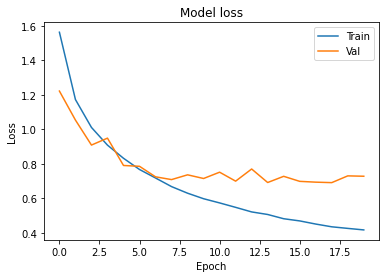

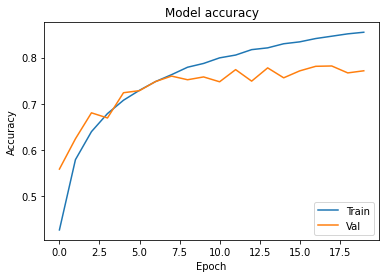

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [39]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 12s 39ms/step - loss: 0.7550 - accuracy: 0.7669


0.7669000029563904

In [40]:
#since it took so long to train, save the model
model.save('my_cifar10_model.h5')

In [41]:
#test on new images
my_image = plt.imread("cat.jpg")

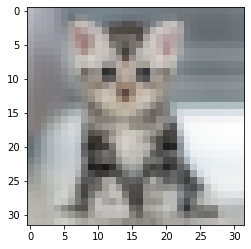

In [42]:
#resize to fit input size of 32 32 3
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [43]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,]))
probabilities

array([[1.7842781e-03, 1.0618274e-04, 2.7549339e-03, 2.2309892e-01,
        1.2546459e-01, 2.7635217e-01, 6.4873777e-02, 3.0487594e-01,
        6.1312632e-04, 7.6047741e-05]], dtype=float32)

In [44]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: horse -- Probability: 0.30487594
Second most likely class: dog -- Probability: 0.27635217
Third most likely class: cat -- Probability: 0.22309892
Fourth most likely class: deer -- Probability: 0.12546459
Fifth most likely class: frog -- Probability: 0.06487378


In [ ]:
#very low accuracy